# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.


---


In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [30]:
cities


['pevek',
 'butaritari',
 'albany',
 'vaini',
 'poum',
 'attawapiskat',
 'tiksi',
 'castro',
 'mehamn',
 'korla',
 'nizhneyansk',
 'chase',
 'kitami',
 'vilyuysk',
 'barentsburg',
 'genhe',
 'illoqqortoormiut',
 'vardo',
 'padang',
 'provideniya',
 'natchez',
 'la ronge',
 'armacao dos buzios',
 'qiongshan',
 'busselton',
 'kaitangata',
 'saskylakh',
 'bengkulu',
 'kapaa',
 'isangel',
 'husavik',
 'georgetown',
 'kamenskoye',
 'port moresby',
 'ijaki',
 'east london',
 'portland',
 'umzimvubu',
 'longyearbyen',
 'ancud',
 'nishihara',
 'port lincoln',
 'konstantinovsk',
 'codrington',
 'lorengau',
 'nantucket',
 'mizan teferi',
 'sistranda',
 'college',
 'hobart',
 'kaeo',
 'ribeira grande',
 'mys shmidta',
 'suriapet',
 'rikitea',
 'padilla',
 'ushuaia',
 'fort nelson',
 'carnarvon',
 'zhigansk',
 'moron',
 'cape town',
 'lavrentiya',
 'avarua',
 'vaitupu',
 'kodiak',
 'puerto ayora',
 'punta arenas',
 'chapais',
 'qaanaaq',
 'dongsheng',
 'necochea',
 'ostrovnoy',
 'barrow',
 'hargey

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
def querygen(api_key='', city=cities):
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" 
    
    return f'{url}?1={city}&apid={api_key}&units=imperial'


#counting the cities
counter_c=0

maxcount=len(cities)


#set parameters
cities=[]
country=[]
clouds=[]
humid=[]
date=[]
long=[]
lat=[]
wind=[]
maxtemp=[]



print(f'Begin Data Retrieval')
print(f'------------------------')
for c in cities:
    counter=counter + 1
    response=requests.get(querygen(api_key=api_key, city=cy)).json()

    try:
        print(f'Processing city {counter_c} of {maxcount}: {response["name"]}')
        print(f'------------------------------------------------------')
        cities.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humid.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['long'])
        maxtemp.append(response['main']['maxtemp'])
        wind.append(response['wind']['speed'])
    except:
        pass
        print(f'***********************************************************')
        print(f'Sorry, we could not find weather for {c}')
        print(f'***********************************************************')

print(f'-----------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------')





Begin Data Retrieval
------------------------
-----------------------
Data Retrieval Complete
-----------------------


In [49]:

city_df=pd.DataFrame({'City': cities,
     'Cloudy': clouds,
     'Country': country,
     'Date': date,
     'Humid': humid,
     'Lat': lat,
     'Long': long,
     'Max Temp': maxtemp,
     'Wind': wind
    })

ValueError: x and y must be the same size

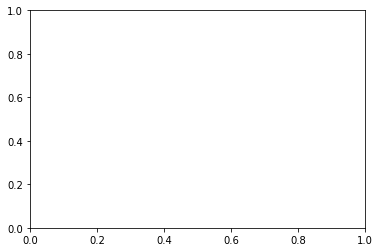

In [43]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            maxtemp,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

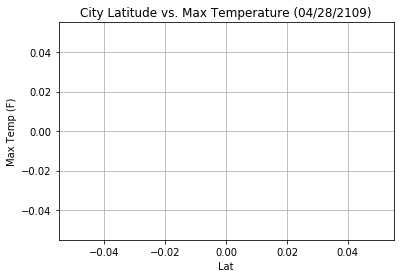

In [50]:
fig, ax = plt.subplots()
plt.grid()
plt.scatter(x=city_df['Lat'], y=city_df['Max Temp'], edgecolors="black", alpha=0.75)
plt.title('City Latitude vs. Max Temperature (04/28/2109)')
ax.set_xlabel("Lat")
ax.set_ylabel("Max Temp (F)")
plt.show()

#### Latitude vs. Humidity Plot

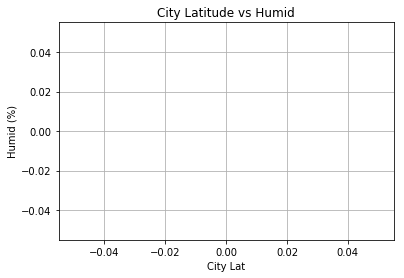

In [59]:
temp=plt.scatter(df['Lat'],df['Humidity'],edgecolors='black',alpha=0.5)
plt.grid(b=True)
plt.title('City Latitude vs Humid')
plt.ylabel('Humid (%)')
plt.xlabel('City Lat')
plt.show()

#### Latitude vs. Cloudiness Plot

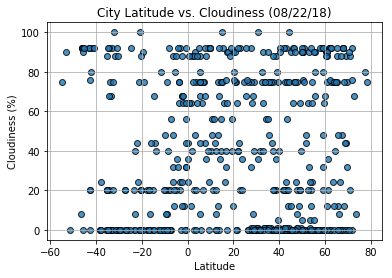

#### Latitude vs. Wind Speed Plot

ValueError: x and y must be the same size

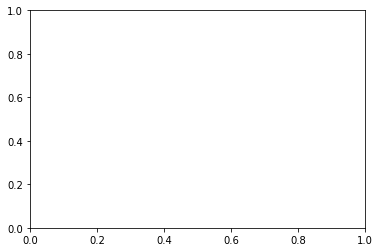

In [61]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Lat vs. Wind spd (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)